> # 서포트 벡터 머신

- 서포트 벡터 머신(Support Vector Machine) 또한 식별기로 사용되며, 선형 외 **비선형 식별**도 가능하여 우수한 사용모델로 알려져 있음

___
> ## scikit-learn으로 선형SVM 만들기

- 본 챕터에서는 다음과 같은 데이터 사용

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import make_moons

def plot_boundary(clf):
    # 0.01 간격의 그리드 만들기
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.1),
                         np.arange(-10, 10, 0.1))
    # 생성한 그리드의 점을 하나하나 추론하기
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 그래프를 그릴 수 있게 2차원 배열로 변환하기
    Z = Z.reshape(xx.shape)

    # 식별 경계 그리기
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
  
  
# scatter plot 함수 (개인 버전)
def plot_scatter(mins=-1, maxs =1):
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(mins, maxs)
  plt.xlim(mins, maxs)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


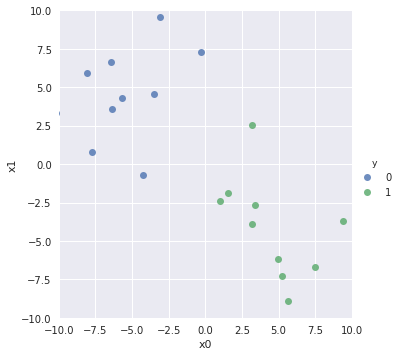

In [2]:
# 본 챕터에서 사용 할 데이터 세트
X_dataset, y_dataset = make_blobs(centers=[[-5, 5], 
                                           [5, -3]],
                                  cluster_std=3,
                                  n_samples=20,
                                  center_box=(-10, 10),
                                  random_state=42)

dataset = pd.DataFrame(X_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset
plot_scatter(mins=-10, maxs=10)

- 학습은 `sklearn.svm` 의 `SVC`(Support Vector Classifier: SVR(Regressor)와 헷갈리지 않도록 Classifier 사용) 모듈로 진행
- 기본 매개변수로 `kernel='rbf`가 지정되어 있어 비선형으로 식별하지만, 'linear'로 설정 시 선형 SVM이 됨
- 학습은 다음과 같이 진행하며, 식별경계는 위의 함수를 사용하여 확인(시각화)

In [3]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_dataset, y_dataset)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


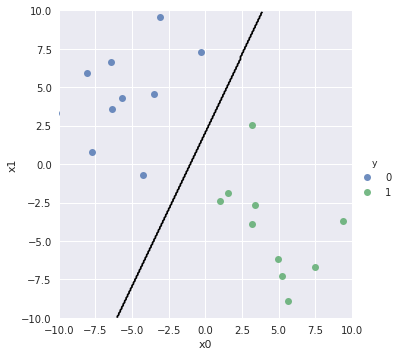

In [4]:
plot_scatter(mins = -10, maxs=10)
plot_boundary(classifier)

___
> ## 서포트 벡터와 마진

- 서포트 벡터의 특징중 하나는 일반화 능력을 높이고자, 훈련 데이터의 각 점으로부터 식별 경계까지의 거리가 최대한 멀어지게 함
- 훈련데이터 중에 식별경계와 가장 거리가 가까운 n개를 서포트 벡터라고 부르며, 이를 되대한 멀리할 수 있는 식별경계를 설정
- 식별 경계와 서포트벡터 사이의 거리를 마진이라고 함 (`classifier.support_vectors_`로 확인 가능)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


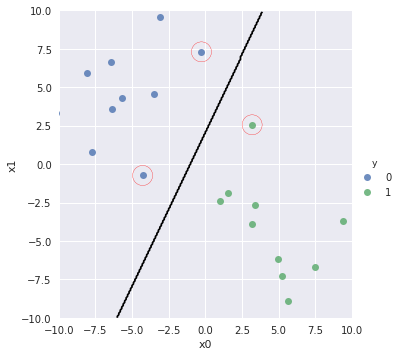

In [5]:
plot_scatter(mins = -10, maxs=10)
plot_boundary(classifier)
plt.scatter(classifier.support_vectors_[:,0],
           classifier.support_vectors_[:,1],
           facecolor='none',
           edgecolor = 'r',
           s=400)

___
>## SVM의 손실 함수

- SVM의 손실함수는 마진과 관련있음
- 퍼셉트론과 같은 힌지함수를 사용하되, 양의방향으로 밀려 있어 제대로 식별하더라도 거리에 따라 손실을 더 주게 됨
- 따라서 제대로 식별 가능하더라도 손실이 발생한다는 점은 로지스틱 회귀와 유사

___
> ## 비선형SVM

- 대다수의 현실 데이터는 비선형으로, scikit-learn의 SVC도 비선형을 사용하는 것이 기본으로 설정 (`kenel = rbf')
- 선형분리할 수 없는 더미 데이터는 아래와 같이 생성


In [6]:
from sklearn.datasets import make_moons
X_dataset, y_dataset = make_moons(n_samples=100, noise = 0.05, random_state=42)
dataset = pd.DataFrame(X_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


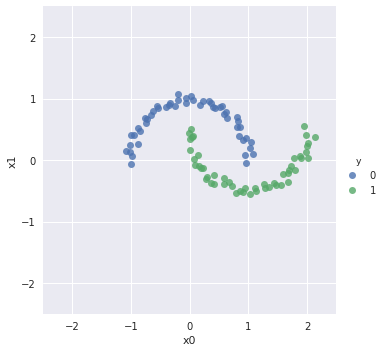

In [7]:
plot_scatter(mins = -2.5, maxs = 2.5)

- 학습코드는 마찬가지로 진행하되 `kernel='rbf'`로 수행

In [8]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_dataset, y_dataset)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
def plot_boundary2(clf):
    #0.01 간격의 그리드 만들기
    xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.01),
                         np.arange(-2.5, 2.5, 0.01))
    # 생성한 그리드의 점을 하나하나 추론하기
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # 그래프를 그릴 수 있게 2차원 배열로 변환하기
    Z = Z.reshape(xx.shape)

    # 식별 경계 그리기
    plt.contour(xx, yy, Z, colors='b',
                levels=[-1, 0, 1], linestyles=['--', '-', '--'])

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


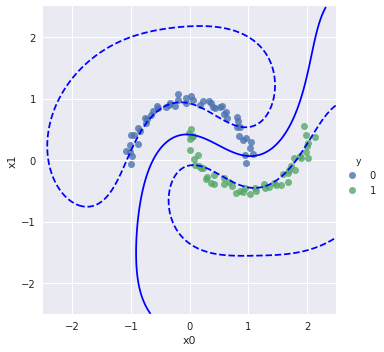

In [11]:
plot_scatter(mins = -2.5, maxs = 2.5)
plot_boundary2(classifier)

- 위에서 실선이 식별 경계, 점선이 마진임
- 오분류는 이후 설명할 매개변수 튜닝을 통해 해결할 수 있는 수준
- 'rbf'는 radial bases function 커널함수를 통해 예제의 2차원 데이터를 고차원으로 확장하여 식별을 시도하는 방법을 시도

___
> ## 매개변수 튜닝하기

- SVM에서 대표적인 매개변수로 "C"와 "gamma"가 있음
- "C"는 노이즈에 얼마나 큰 패널티를 부여할지, 마진을 얼마나 넓게 부여할지 정하는 매개변수임 (default: 1.0)
- "gamma"는 고차원으로 확장할 때의 계수로 사용하며, 값이 클 수록 식별경계를 잘 찾지만 overfitting 결과를 초래 (default: auto)
- 매개변수 설정 방법은 다음 두가지 방법으로 설정 가능:
    ```python
    classifier = SVC(kernel = 'rbf', C=1.0, gamma =0.5)
    ```
    또는
    ```python
    classifier = SVC(kernel = 'rbf)
    classifier.C = 1.0
    classifier.gamma = 0.5
    ```
- 테스트 데이터세트로는 `make_moons`를 사용하되, `noise`를 높여 성능을 비교

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


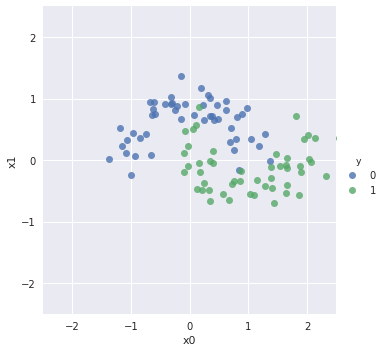

In [12]:
from sklearn.datasets import make_moons
X_dataset, y_dataset = make_moons(n_samples=100, noise = 0.2, random_state=42)
dataset = pd.DataFrame(X_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset

plot_scatter(mins=-2.5, maxs=2.5)

- 위 데이터세트 기반으로 식별경계를 만들 때 'C'와 'gamma'에 따른 결과는 아래 코드로 확인 가능

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


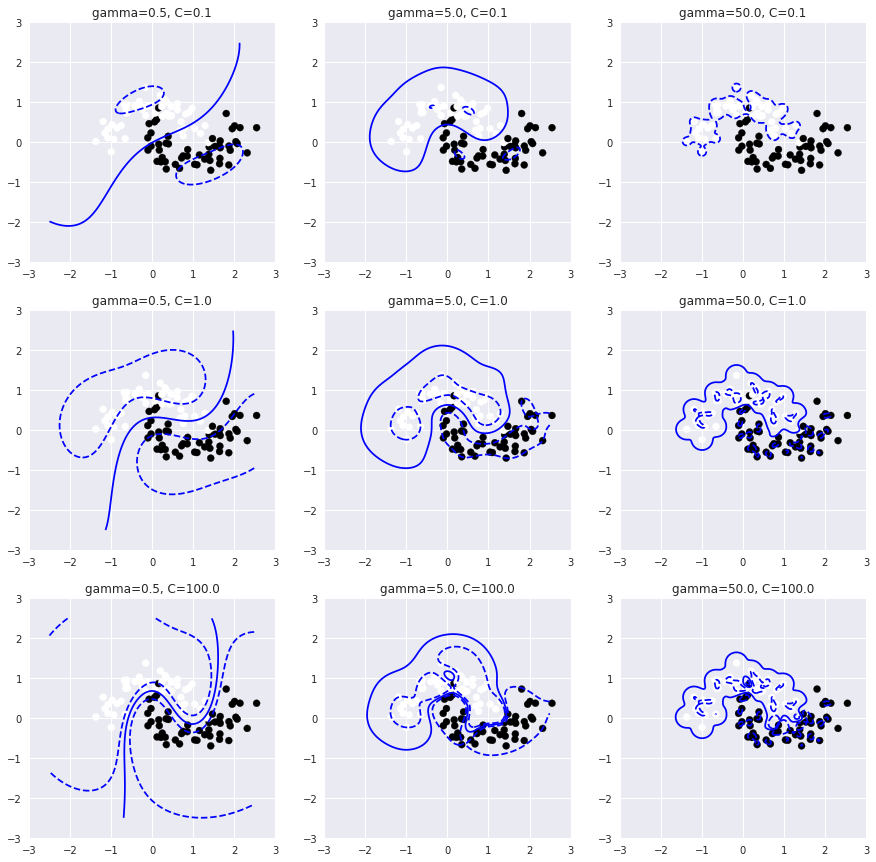

In [50]:
classifier = SVC()

c_range = [0.1, 1.0, 100.0]
gamma_range = [0.5, 5.0, 50.0]

fig, axs = plt.subplots(3, 3, figsize = (15, 15))
axs = axs.ravel()
xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.01), np.arange(-2.5, 2.5, 0.01))

i=0
for c in c_range:
  for g in gamma_range:
    classifier.C = c
    classifier.gamma = g
    classifier.fit(X_dataset, y_dataset)
      
    axs[i].scatter('x0', 'x1', c = 'y', data = dataset)
    axs[i].set_ylim([-3, 3])
    axs[i].set_xlim([-3, 3])
      
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
  
    axs[i].contour(xx, yy, Z, colors='b', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    axs[i].set_title('gamma=%.1f, C=%.1f' % (g, c))
    i += 1

- 행에 따라 "C"의 증감, 열에 따라 "gamma"의 증감 확인 가능
- "C"가 증가함에 따라 식별경계와 마진이 좁아지는 것을 확인 할 수 있음
- "gamma"가 증가함에 따라 데이터에 맞춰 분류하는 경향을 볼 수 있음